In [1]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PlotFuncs import *
from AxionFuncs import *
from matplotlib import colors as c
import cmasher as cmr

k = 0.04

n = 1000
fvals = logspace(7,15,n)
epsvals = logspace(-6.8,0,n)
f,eps = meshgrid(fvals,epsvals)
dm_sq,m1,m2,tan_2alpha = Parameters(f,eps)

SR = Superradiance('Mehta',fvals,epsvals,k=k)

/Users/ciaranohare/Work/CompAxion/AxionFuncs.py:56: RuntimeWarning: invalid value encountered in sqrt
  m2 = 1e9*sqrt(K_QCD/f**2*((N0+N1*eps**2)-(4*N2**2*eps**2 + (N0-N1*eps**2)**2)**0.5))


In [2]:
# Case I
theta_1_max,theta_2_max = Thetas_CaseI(f,eps,k)
theta_1_max[theta_1_max>pi-0.1] = nan
theta_1_max[theta_1_max<0.1] = nan
theta_2_max[theta_2_max>pi-0.1] = nan
theta_2_max[theta_2_max<0.1] = nan
theta_comb = theta_1_max+theta_2_max
theta_comb = ~isnan(theta_comb)
theta_2_max = ~isnan(theta_2_max)
theta_1_max = ~isnan(theta_1_max)
Omega1,Omega2 = Omega_CaseI(f,eps,k,1.0,1.0)
Omega_ratio_CaseI = Omega2/(Omega1+Omega2)
Omega_ratio_CaseI[~theta_comb] = nan
ADMX_CaseI = MapHaloscope_m1('ADMX',fvals,epsvals,Omega_a1=1-Omega_ratio_CaseI)+MapHaloscope_m2('ADMX',fvals,epsvals,Omega_a2=Omega_ratio_CaseI)
ADMX_CaseI += MapHaloscope_m1('ADMX2018',fvals,epsvals,Omega_a1=1-Omega_ratio_CaseI)+MapHaloscope_m2('ADMX2018',fvals,epsvals,Omega_a2=Omega_ratio_CaseI)
ADMX_CaseI += MapHaloscope_m1('ADMX2019_1',fvals,epsvals,Omega_a1=1-Omega_ratio_CaseI)+MapHaloscope_m2('ADMX2019_1',fvals,epsvals,Omega_a2=Omega_ratio_CaseI)
ADMX_CaseI += MapHaloscope_m1('ADMX2019_2',fvals,epsvals,Omega_a1=1-Omega_ratio_CaseI)+MapHaloscope_m2('ADMX2019_2',fvals,epsvals,Omega_a2=Omega_ratio_CaseI)
ADMX_CaseI += MapHaloscope_m1('ADMX2021',fvals,epsvals,Omega_a1=1-Omega_ratio_CaseI)+MapHaloscope_m2('ADMX2021',fvals,epsvals,Omega_a2=Omega_ratio_CaseI)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/Users/ciaranohare/Work/CompAxion/AxionFuncs.py:112: RuntimeWarning: invalid value encountered in greater
  constrained = ((g*Prob)>g_lim_interp)


In [3]:
# Case II
theta_2_CaseII,Omega1,Omega2 = Theta2_CaseII(f,eps,k)
Omega_tot = Omega1+Omega2
Omega_ratio_CaseII = Omega2/(Omega1+Omega2)
Omega_ratio_CaseII[theta_2_CaseII>pi-0.1] = nan
Omega_ratio_CaseII[theta_2_CaseII<0.1] = nan
Omega_ratio_CaseII[Omega1>0.12] = nan
Omega_ratio_CaseII[Omega2>0.12] = nan
ADMX_CaseII = MapHaloscope_m1('ADMX',fvals,epsvals,Omega_a1=1-Omega_ratio_CaseII)+MapHaloscope_m2('ADMX',fvals,epsvals,Omega_a2=Omega_ratio_CaseII)
ADMX_CaseII += MapHaloscope_m1('ADMX2018',fvals,epsvals,Omega_a1=1-Omega_ratio_CaseII)+MapHaloscope_m2('ADMX2018',fvals,epsvals,Omega_a2=Omega_ratio_CaseII)
ADMX_CaseII += MapHaloscope_m1('ADMX2019_1',fvals,epsvals,Omega_a1=1-Omega_ratio_CaseII)+MapHaloscope_m2('ADMX2019_1',fvals,epsvals,Omega_a2=Omega_ratio_CaseII)
ADMX_CaseII += MapHaloscope_m1('ADMX2019_2',fvals,epsvals,Omega_a1=1-Omega_ratio_CaseII)+MapHaloscope_m2('ADMX2019_2',fvals,epsvals,Omega_a2=Omega_ratio_CaseII)
ADMX_CaseII += MapHaloscope_m1('ADMX2021',fvals,epsvals,Omega_a1=1-Omega_ratio_CaseII)+MapHaloscope_m2('ADMX2021',fvals,epsvals,Omega_a2=Omega_ratio_CaseII)

# # Case III
Omega1,Omega2 = Omega_CaseIII(f,eps,k)
Omega_tot = Omega1+Omega2
Omega_ratio_CaseIII = Omega2/(Omega1+Omega2)
Omega_ratio_CaseIII[Omega_tot<0.115] = nan
Omega_ratio_CaseIII[Omega_tot>0.125] = nan

/Users/ciaranohare/Work/CompAxion/AxionFuncs.py:418: RuntimeWarning: invalid value encountered in sqrt
  theta_2 = theta_1*sqrt((Omega_dm/Omega1 - 1)/ke)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


In [4]:
def Omega_gw(fvals,m,k,A=0.8,eg=0.7,Omega_rad=4.15e-5):
    
    M2 = 2.4e18*1e9
    M = 1.22e19*1e9
    A = 0.8
    
    g = 10
    g0 = 3.36
    gs0 = 3.1
    gann = 10
    gsann = 10
    
    sigma = K_QCD*(1e9**4)/m # eV
    
    Tann = sqrt(m/(1+1/k))*sqrt(M2/(2*pi))*(90/g)**(1/4) # eV
    
    Oann = eg*A**2*sigma**2/(Tann**4*M**2)
                                
    fpeak = 1.1e-9*(Tann/1e7)
    Opeak = Omega_rad*(gann/g0)*(gs0/gsann)**(4/3)*Oann
    i_fpeak = argmin(abs(fvals-fpeak))
    
    Omega1 = Opeak*(fvals/fpeak)**3
    Omega2 = Opeak*(fvals/fpeak)**-1
    Omega = 0*fvals
    Omega[1:i_fpeak] = Omega1[1:i_fpeak]
    Omega[i_fpeak:] = Omega2[i_fpeak:]
    return Omega


def MapLimit_GW(file,ni=200,m_max=1e-8,m_min=1e-20,k=0.6,AnomalyCoefficients=[3,0.5,13/2,3/2],A=0.8,eg=0.7,Omega_rad=4.15e-5):
    mvals = flipud(logspace(log10(m_min),log10(m_max),ni))
                     
    dat = 10.0**loadtxt('limit_data/GravitationalWaves/power-law-integrated_sensitivities/plis_'+file+'.dat')[:,0:2]
    f_lim = dat[:,0]
    O_lim = dat[:,1]
    ni = shape(m2)[0]
    nj = shape(m2)[1]
    constrained = zeros_like(m2)
    for i in range(0,ni):   
        Omega = Omega_gw(f_lim,mvals[i],k,A=A,eg=eg,Omega_rad=Omega_rad)
        if sum(Omega>O_lim):
            m_lim = mvals[i]
            break
    return m_lim


m_SKA = MapLimit_GW('SKA',k=k)
#m_PT = amin([MapLimit_GW('SKA',k=k),MapLimit_GW('PPTA',k=k),MapLimit_GW('NANOGrav',k=k)])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: linewidths is ignored by contourf
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: linewidths is ignored by contourf
/Users/ciaranohare/Work/CompAxion/PlotFuncs.py:65: UserWarning: No contour levels were found within the data range.
  ax.contour(fvals,epsvals,con,levels=[0],linewidths=lw,colors=edgecolor,linestyles=linestyle,zorder=zorder)
/Users/ciaranohare/Work/CompAxion/AxionFuncs.py:56: RuntimeWarning: invalid value encountered in sqrt
  m2 = 1e9*sqrt(K_QCD/f**2*((N0+N1*eps**2)-(4*N2**2*eps**2 + (N0-N1*eps**2)**2)**0.5))


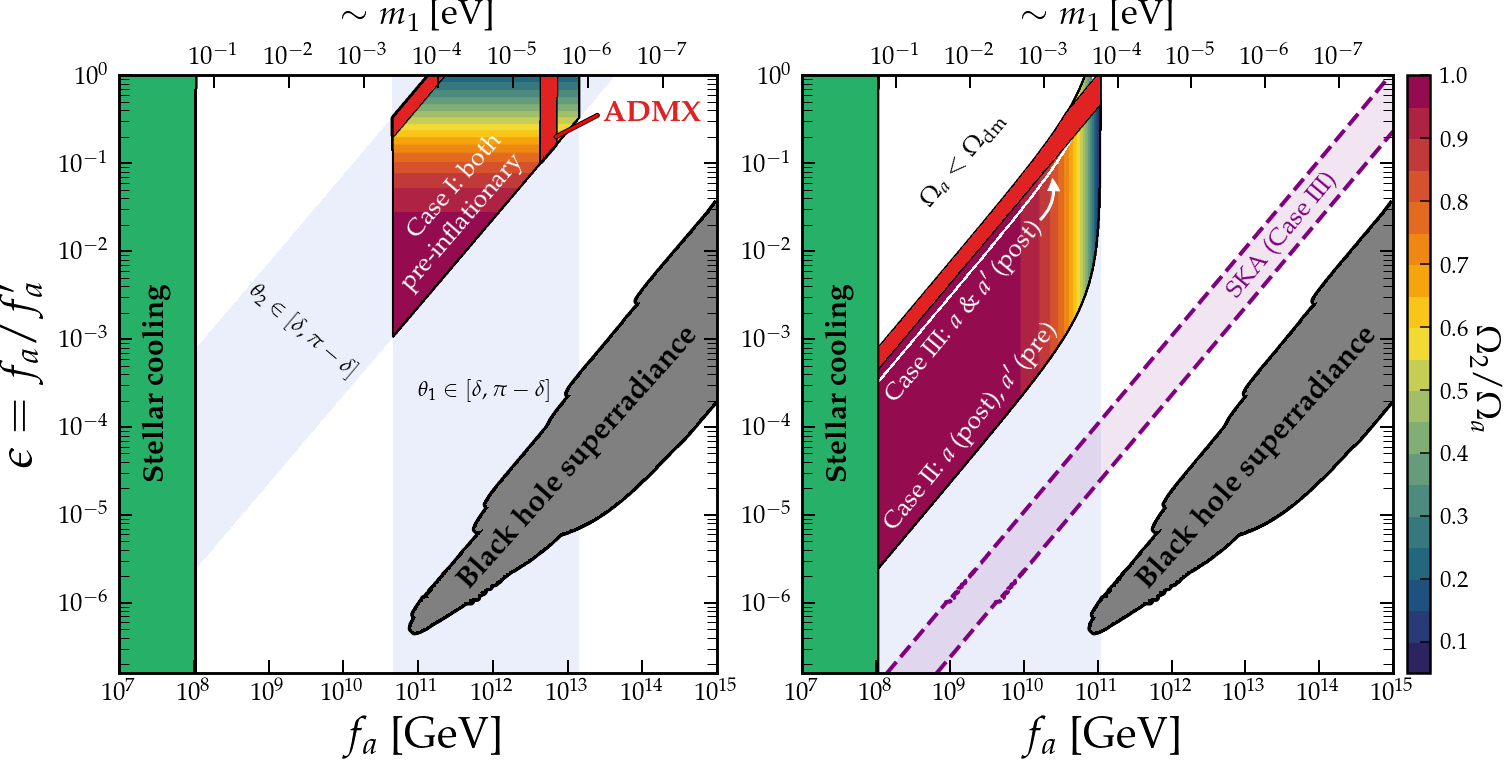

In [31]:
from matplotlib import colors as c
mypride = c.LinearSegmentedColormap.from_list('name', cmr.pride(linspace(0.05,0.85)))

fig,ax1,ax2 = Plot_PQscales_TwoPanel(fvals,epsvals,size_x=25,wspace=0.13,width_ratios=[1,1.19])

im1 = ax1.contourf(fvals,epsvals,Omega_ratio_CaseI,zorder=-10,cmap=mypride,levels=linspace(0.05,1,20))
im2 = ax2.contourf(fvals,epsvals,Omega_ratio_CaseII,zorder=-10,cmap=mypride,levels=linspace(0.05,1,20))
for ci in im1.collections: ci.set_edgecolor("face")
for ci in im2.collections: ci.set_edgecolor("face")
ax1.contour(fvals,epsvals,theta_comb,linestyles='-',zorder=10,colors='k')
ax2.contour(fvals,epsvals,Omega_ratio_CaseII>0,linestyles='-',zorder=0,colors='k')

# ax1
PlotContour(ax1,fvals,epsvals,theta_1_max,zorder=-100,alpha=0.1,facecolor='royalblue',edge_on=False)
PlotContour(ax1,fvals,epsvals,theta_2_max,zorder=-100,alpha=0.1,facecolor='royalblue',edge_on=False)
ax1.text(1e11,2e-4,r'$\theta_1 \in [\delta,\pi-\delta]$',rotation=0,fontsize=22)
ax1.text(0.45e9,3.5e-4,r'$\theta_2 \in [\delta,\pi-\delta]$',rotation=-40,fontsize=22)
ax1.text(3e12,3.7e-3,'Case I: both \n pre-inflationary',ha='right',color='w',fontsize=25,rotation=49)

#plt.gcf().text(0.15,0.15,'$\kappa = 0.04$',fontsize=25)
#plt.gcf().text(0.15,0.19,r'$\left\{N,N^\prime,N_g,N^\prime_g\right\} = \left\{3,\frac{1}{2},\frac{13}{2},\frac{3}{2}\right\}$',fontsize=25)

# ax2
plt.contourf(fvals,epsvals,Omega_ratio_CaseIII,zorder=0.0,colors='w',levels=1,linewidths=3)
plt.contour(fvals,epsvals,Omega_ratio_CaseIII,zorder=0.0,colors='w',levels=1,linewidths=3)
PlotContour(ax2,fvals,epsvals,theta_2_CaseII,zorder=-100,alpha=0.1,facecolor='royalblue',edge_on=False)
ax2.contour(fvals,epsvals,m2,levels=[1e-10],linestyles='--',colors='purple',zorder=-1,linewidths=4,alpha=1)
ax2.contour(fvals,epsvals,m2,levels=[m_SKA],linestyles='--',colors='purple',zorder=-1,linewidths=4,alpha=1)
ax2.contourf(fvals,epsvals,m2,levels=[1e-10,m_SKA],linestyles='-',colors='purple',zorder=-1,linewidths=2,alpha=0.1)


ax2.text(0.5e13,0.3e-2,r'SKA (Case III)',fontsize=25,color='purple',rotation=50)
#ax2.text(0.15e12,0.05e-3,r'NANOGrav+PPTA+EPTA (Case III)',fontsize=25,color='purple',rotation=50)

ax2.text(1.5e9,2e-4,'Case III: $a$ \& $a^\prime$ (post)',ha='center',color='w',fontsize=25,rotation=50)
ax2.text(1.9e9,0.7e-5,'Case II: $a$ (post), $a^\prime$ (pre)',ha='center',color='w',fontsize=25,rotation=51)

# ADMX
PlotContour(ax1,fvals,epsvals,ADMX_CaseI,zorder=0.0,alpha=1.0,lw=3,facecolor=ADMX_col,edgecolor='k',linestyle='-')
ax1.text(0.3e14,3e-1,r'{\bf ADMX}',color=ADMX_col,fontsize=30,rotation=0)
ax1.plot([0.25e14,0.07e14],[3.5e-1,2e-1],'r-',lw=3,zorder=100,path_effects=line_background(5,'k'),solid_capstyle='round')
PlotContour(ax2,fvals,epsvals,ADMX_CaseII,zorder=0.0,alpha=1.0,lw=3,facecolor=ADMX_col,edgecolor='k',linestyle='-')

# Superradiance
PlotContour(ax1,fvals,epsvals,SR,zorder=0.1,alpha=1.0,lw=7,facecolor='gray',edgecolor='k',linestyle='-')
ax1.text(3e11,1.5e-6,r'{\bf Black hole superradiance}',fontsize=30,color='k',rotation=48)
PlotContour(ax2,fvals,epsvals,SR,zorder=0.1,alpha=1.0,lw=7,facecolor='gray',edgecolor='k',linestyle='-')
ax2.text(3e11,1.5e-6,r'{\bf Black hole superradiance}',fontsize=30,color='k',rotation=48)

# Stellar cooling
StellarCooling(ax1,fvals,epsvals,text_pos=[2e7,3e-5])
StellarCooling(ax2,fvals,epsvals,text_pos=[2e7,3e-5])

# colorbar
cb2 = fig.colorbar(im2,ax=ax2,pad=0.02,aspect=26)
cb2.set_ticks(arange(0.1,1+0.1,0.1))
cb2.solids.set_edgecolor("face")
cb2.ax.tick_params(which='major',length=10,width=1.5,direction='in',labelsize=23,pad=10)
plt.gcf().text(0.882,0.44,r'$\Omega_{2}/\Omega_a$',color='w',rotation=-90,fontsize=35,ha='center')
plt.gcf().text(0.88,0.44,r'$\Omega_{2}/\Omega_a$',rotation=-90,fontsize=35,ha='center')


# Upper axes
ax1_u = ax1.twiny()
ax1_u.set_xscale('log')
plt.gcf().text(0.5,0.93,'--',color='w',zorder=-1000)
ax1_u.set_xlabel('$\sim m_1$ [eV]',fontsize=35,labelpad=15)
ax1_u.set_xlim([m1[0,0],m1[0,-1]])
ax1_u.tick_params(direction='in',width=2,length=13)
ax2_u = ax2.twiny()
ax2_u.set_xscale('log')
plt.gcf().text(0.5,0.93,'--',color='w',zorder=-1000)
ax2_u.set_xlabel('$\sim m_1$ [eV]',fontsize=35,labelpad=15)
ax2_u.set_xlim([m1[0,0],m1[0,-1]])
ax2_u.tick_params(direction='in',width=2,length=13)

ax1.set_yticks(10.0**arange(-6,1))
ax2.set_yticks(10.0**arange(-6,1))
ax1.set_xticks(10.0**arange(7,16))
ax2.set_xticks(10.0**arange(7,16))
ax2_u.set_xticks(10.0**arange(-7,0))
ax1_u.set_xticks(10.0**arange(-7,0));

ax2.text(4e8,3e-2,r'$\Omega_a<\Omega_{\rm dm}$',fontsize=25,rotation=50)



CurvedArrow(ax2,1.6e10,2.4e10,2.2e-2,7e-2,color='w',alpha=1)

ax1.set_xlabel(r'$f_a$ [GeV]',fontsize=43,labelpad=15)
ax2.set_xlabel(r'$f_a$ [GeV]',fontsize=43,labelpad=15)

MySaveFig(fig,'Cosmology')